## Data Cleaning del Archivo `'air_traffic_data.csv'`

In [2]:
import dask.dataframe as dd

In [6]:
df = dd.read_csv('data/air_traffic_data.csv',sep=',')

In [8]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [9]:
df.isnull().any().compute()

Activity Period                False
Operating Airline              False
Operating Airline IATA Code     True
Published Airline              False
Published Airline IATA Code     True
GEO Summary                    False
GEO Region                     False
Activity Type Code             False
Price Category Code            False
Terminal                       False
Boarding Area                  False
Passenger Count                False
Adjusted Activity Type Code    False
Adjusted Passenger Count       False
Year                           False
Month                          False
dtype: bool

Sabemos que hay nulos en `Published Airline IATA Code` y en `Operating Airline IATA Code`

In [11]:
df[df['Published Airline IATA Code'].isnull() & df['Operating Airline IATA Code'].isnull()].compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


Vamos a comprobar todos los elementos que existen en estas dos columnas

In [13]:
for element in df['Operating Airline IATA Code'].unique().compute():
    print(element)

TZ
AC
CA
AF
NZ
FL
AS
NH
AA
MQ
OZ
EV
4T
BA
CX
CI
DL
BR
F9
HA
QX
FI
DH
JL
KL
KE
LH
YV
MX
YX
NW
PR
SQ
OO
SY
TA
US 
UA
VS
WS
nan
GL
QK
QF
A8
NK
XP
EZ
AM
B6
XE
WN
VX
EI
G4
9W
BBB
EK
XJ
WO
AB
RW
LX
LP
SE
MU
SK
5Y
CP
EY
CZ
TK
CM
AI


In [14]:
for element in df['Published Airline IATA Code'].unique().compute():
    print(element)

TZ
AC
CA
AF
NZ
FL
AS
NH
AA
OZ
DL
4T
BA
CX
CI
BR
F9
HA
FI
DH
JL
KL
KE
LH
US 
MX
YX
NW
PR
SQ
UA
SY
TA
VS
WS
nan
GL
QF
A8
NK
XP
EZ
AM
B6
WN
VX
EI
G4
9W
BBB
EK
WO
AB
RW
LX
LP
SE
MU
SK
5Y
EY
CZ
TK
CM
AI


Son las mismas cosas y se desconocen para los mismos elementos

In [15]:
import seaborn as sns

<AxesSubplot:>

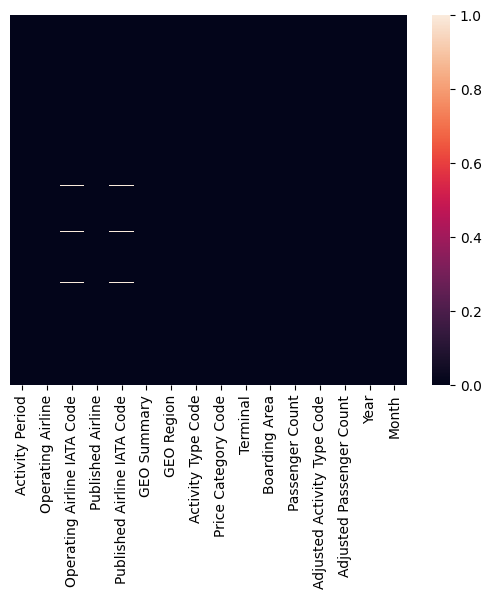

In [16]:
sns.heatmap(df.isnull().compute(), yticklabels=False)

La verdad es que estos datos vienen bastante limpios ya de por sí